Aarian Dhanani

4/1/2022

In [135]:
#Setting up
import pandas as pd
import csv, matplotlib.pyplot as plt
import os
os.system('clear')

#Opening the files
population = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

#Add Puerto Rico
abbrevs.loc[len(abbrevs.index)] = ['Puerto Rico','PR']

In [136]:
#Merge the dataframes
merged1 = pd.merge(areas, abbrevs, on="state")
population = population.rename(columns={'state/region': 'abbreviation'})
merged = pd.merge(population, merged1, on="abbreviation")

In [137]:
#Delete unecessary rows
merged = merged[merged['ages'] != 'under18']
merged = merged[merged['year'] == 2010]

#Add population density column
merged['population density'] = merged['population']/merged['area (sq. mi)']

#Sort the dataframe by population density (highest to lowest)
merged = merged.sort_values(by = 'population density', ascending = False)

#Reset the index
merged.reset_index(inplace = True, drop = False)

#Drop all columns except for the top 10
merged = merged.drop(range(10,52))

#Drop unecessary columns
merged.drop('index', inplace = True, axis = 1)
merged.drop('ages', inplace = True, axis = 1)
merged.drop('abbreviation', inplace = True, axis = 1)
merged.drop('year', inplace = True, axis = 1)
merged.drop('population', inplace = True, axis = 1)
merged.drop('area (sq. mi)', inplace = True, axis = 1)

                  state  population density
0  District of Columbia         8898.897059
1           Puerto Rico         1058.665149
2            New Jersey         1009.253268
3          Rhode Island          681.339159
4           Connecticut          645.600649
5         Massachusetts          621.815538
6              Maryland          466.445797
7              Delaware          460.445752
8              New York          356.094135
9               Florida          286.597129


<AxesSubplot:xlabel='state'>

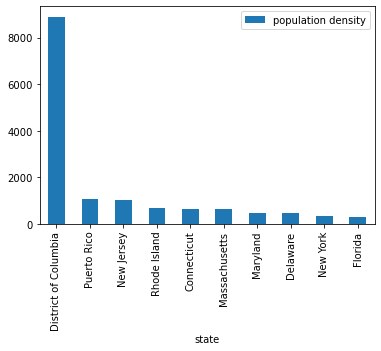

In [138]:
#Display the dataframe
print(merged)

#Plot the data on a bar chart
merged.plot.bar(x = 'state', y = 'population density')